Importing libraries

In [111]:
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import json
from math import floor
import pathlib

Loading the data for analysis of run times

In [112]:
rootFolder = '/home/cristiano/Dropbox/UFMG/Cristiano/Doutorado/Segunda Etapa da Qualificação/OptimizingCarsharingStationsLocation/'
folder = rootFolder + 'SASS/'
dataList = list()
paramsUpTo2Half = ['0', '0.5', '1', '1.5', '2', '2.5']
for parameter in paramsUpTo2Half:
    for counter in range(1, 41):
        fileName = folder + str(parameter) + '/' + str(counter) + '.json'
        with open(fileName) as jsonFile:
            optimalSolution = json.load(jsonFile)

            dataList.append((parameter, optimalSolution["SolutionInfo"]["Runtime"]))

dataFrame = pd.DataFrame(data=dataList, dtype=float)
dataFrame['Method'] = 'MILP'
print(dataFrame)

def read_heuristics_files(folderHeuristicsData, paramsUpTo, budgets=['foo'], new_index=True):
    df_dijkstra = pd.DataFrame()
    df_max_utility = pd.DataFrame()
    for parameter in paramsUpTo:
        for budget in budgets:
            budget_suffix = ''
            if budget != 'foo':
                budget_suffix = '_' + str(budget) + '_costs'

            filename = folderHeuristicsData + 'dijkstra_order_' + parameter + '_200' + budget_suffix + '.txt'
            df_read_dijkstra = pd.read_csv(filename, sep=' ', header=None)
            
            filename = folderHeuristicsData + 'max_utility_order_' + parameter + '_200' + budget_suffix + '.txt'
            df_read_max_utility = pd.read_csv(filename, sep=' ', header=None)
            if budget != 'foo':
                column_pos = len(df_read_dijkstra.columns)
                df_read_dijkstra[column_pos] = budget
                df_read_dijkstra.rename(columns={column_pos: 'Budget'}, inplace=True)

                df_read_max_utility[column_pos] = budget
                df_read_max_utility.rename(columns={column_pos: 'Budget'}, inplace=True)

            df_dijkstra = pd.concat([df_dijkstra, df_read_dijkstra], ignore_index=new_index)
            df_max_utility = pd.concat([df_max_utility, df_read_max_utility], ignore_index=new_index)

    column_pos = len(df_dijkstra.columns)
    df_dijkstra[column_pos] = 'Dijkstra'
    df_dijkstra.rename(columns={column_pos: 'Method'}, inplace=True)

    df_max_utility[column_pos] = 'MaxUtility'
    df_max_utility.rename(columns={column_pos: 'Method'}, inplace=True)

    return df_dijkstra, df_max_utility

folderHeuristics = rootFolder + 'heuristics_results/'
folderRunTimeHeuristics = folderHeuristics + 'run_times/'
folderObjectiveHeuristics = folderHeuristics + 'objective_values/'
df_dijkstra, df_max_utility = read_heuristics_files(folderRunTimeHeuristics, paramsUpTo2Half)
print(df_dijkstra)
print(df_max_utility)

#dataFramePD = dataFrame.to_pandas()
dataList = None

       0            1 Method
0    0.0    28.750953   MILP
1    0.0    28.505345   MILP
2    0.0    28.716897   MILP
3    0.0    28.556612   MILP
4    0.0    28.544656   MILP
..   ...          ...    ...
235  2.5  2304.829251   MILP
236  2.5  2301.578075   MILP
237  2.5  2298.301059   MILP
238  2.5  2300.488853   MILP
239  2.5  2300.098299   MILP

[240 rows x 3 columns]
       0       1    Method
0    0.0  201403  Dijkstra
1    0.0  197697  Dijkstra
2    0.0  195257  Dijkstra
3    0.0  196429  Dijkstra
4    0.0  190932  Dijkstra
..   ...     ...       ...
235  2.5  626526  Dijkstra
236  2.5  621400  Dijkstra
237  2.5  624258  Dijkstra
238  2.5  623430  Dijkstra
239  2.5  623878  Dijkstra

[240 rows x 3 columns]
       0       1      Method
0    0.0  187616  MaxUtility
1    0.0  176186  MaxUtility
2    0.0  173572  MaxUtility
3    0.0  184002  MaxUtility
4    0.0  168987  MaxUtility
..   ...     ...         ...
235  2.5  554377  MaxUtility
236  2.5  559634  MaxUtility
237  2.5  563559  M

Analysing the run times

MILP
0              0.0        0.5         1.0         1.5         2.0          2.5 \\
1 count  & 40.0000  & 40.0000   & 40.0000   & 40.0000   & 40.0000    & 40.0000 \\
  mean   & 28.6212  & 62.5565  & 103.4426  & 276.7426  & 491.0741  & 2304.2759 \\
  std     & 0.0847   & 1.1745    & 0.1401    & 0.2480    & 0.5176     & 7.4962 \\
  min    & 28.4838  & 58.4579  & 103.1448  & 276.2869  & 490.0947  & 2298.3011 \\
  25%    & 28.5742  & 62.7730  & 103.3534  & 276.5622  & 490.6959  & 2301.5210 \\
  50%    & 28.6028  & 62.8854  & 103.4573  & 276.6698  & 491.0829  & 2303.4392 \\
  75%    & 28.6411  & 62.9599  & 103.5379  & 276.8465  & 491.3701  & 2305.1356 \\
  max    & 28.9554  & 63.0650  & 103.6803  & 277.4649  & 492.6777  & 2348.2902


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


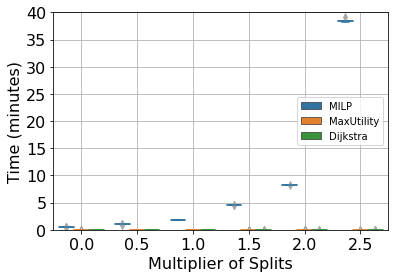

/tmp/ipykernel_10539/3559821274.py:28: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ax.set_ylim([0, 60])
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


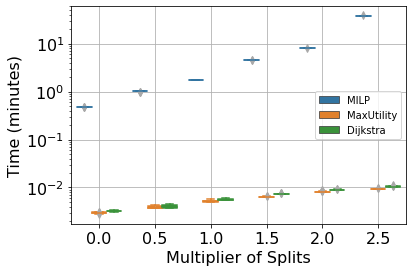

Dijkstra
0              0.0        0.5        1.0        1.5        2.0        2.5        3.0        3.5        4.0        4.5        5.0        5.5        6.0        6.5        7.0        7.5        8.0        8.5        9.0 \\
1 count  & 40.0000  & 40.0000  & 40.0000  & 40.0000  & 40.0000  & 40.0000  & 40.0000  & 40.0000  & 40.0000  & 40.0000  & 40.0000  & 40.0000  & 40.0000  & 40.0000  & 40.0000  & 40.0000  & 40.0000  & 40.0000  & 40.0000 \\
  mean    & 0.1935   & 0.2426   & 0.3380   & 0.4369   & 0.5378   & 0.6296   & 0.7440   & 0.8528   & 1.0175   & 1.1228   & 1.2378   & 1.3405   & 1.4481   & 1.5429   & 1.6581   & 1.7980   & 1.9269   & 2.0644   & 2.3042 \\
  std     & 0.0051   & 0.0140   & 0.0076   & 0.0067   & 0.0056   & 0.0110   & 0.0112   & 0.0110   & 0.0093   & 0.0127   & 0.0120   & 0.0171   & 0.0172   & 0.0193   & 0.0170   & 0.0139   & 0.0226   & 0.0222   & 0.0188 \\
  min     & 0.1833   & 0.2276   & 0.3290   & 0.4304   & 0.5296   & 0.6204   & 0.7323   & 0.8397   & 1.0056   & 

In [113]:
def formatFloat(value):
    numDecimaPlaces = 4
    return " & " + "{:.{nDigits}f}".format(value, nDigits=numDecimaPlaces)

def printTableRunTime(dataFrame, name_method):
    print(name_method)
    stringKdf = dataFrame.groupby(by=0).describe().T.to_string(float_format=formatFloat).replace("\n", " \\\\\n")
    print(stringKdf)

#print(dataFrame.groupby(by=0).describe())
# The .T. after the describe method is to transpose the data frame. By doing so, if will fit in the PhD thesis page's width.
printTableRunTime(dataFrame, 'MILP')

# Converting from seconds to minutes
dataFrame[1] = dataFrame[1]/60
df_dijkstra[1] = df_dijkstra[1]/(60 * 1000000)
df_max_utility[1] = df_max_utility[1]/(60 * 1000000)

#ax = dataFrame.boxplot(by=0, fontsize=16)
all_data = pd.concat([dataFrame, df_max_utility, df_dijkstra])

for with_log_scale in [False, True]:
    ax = sns.boxplot(x=all_data[0], y=all_data[1], hue=all_data['Method'])
    filename = 'SASSTimeSpentBoxplots.eps'
    if with_log_scale:
        ax.set_yscale('log')
        filename = 'log_' + filename
        ax.set_ylim([0, 60])

    else:
        ax.set_ylim([0, 40])
        ax.set_yticks(range(0, 45, 5))

    fig = ax.get_figure()
    fig.suptitle('')
    ax.set_title('')
    ax.set_xlabel("Multiplier of Splits", fontsize=16)

    #ax.set_ylabel("Time (seconds)", fontsize=16)
    #ax.set_ylim([0, 2450])
    ax.set_ylabel("Time (minutes)", fontsize=16)
    ax.legend(loc="center right")

    # Setting the border color
    for i, artist in enumerate(ax.artists):
        # Set the linecolor on the artist to the facecolor
        col = artist.get_facecolor()
        artist.set_edgecolor(col)
        artist.set_facecolor(col)

        outlier_color = "darkgrey"
        # Each box has 6 associated Line2D objects (to make the whiskers, fliers, etc.)
        # Loop over them here, and use the same colour as above, except for fliers (outliers)
        for j in range(i*6, i*6+6):
            if j == i*6+5:
                col = outlier_color
            else:
                col = artist.get_facecolor()

            line = ax.lines[j]
            line.set_color(col)
            line.set_mfc(col)
            line.set_mec(col)

    plt.grid()
    plt.tick_params(axis='both', which='major', labelsize=16)
    plt.savefig(filename, format='eps', bbox_inches = "tight")
    plt.show()

paramsUpTo9 = [str(x) if x != floor(x) else str(int(x)) for x in np.arange(0, 9.5, 0.5)]
df_dijkstra, df_max_utility = read_heuristics_files(folderRunTimeHeuristics, paramsUpTo9)
# Converting times from microseconds to seconds
df_dijkstra[1] = df_dijkstra[1]/1000000
df_max_utility[1] = df_max_utility[1]/1000000
printTableRunTime(df_dijkstra, 'Dijkstra')
printTableRunTime(df_max_utility, 'MaxUtility')

In [114]:
k2, p = stats.normaltest(dataFrame[dataFrame[0] == 2.0][1].to_numpy())
alpha = 5e-2
print("p = {:g}".format(p))
if p < alpha:  # null hypothesis: x comes from a normal distribution
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis cannot be rejected")

p = 0.0928856
The null hypothesis cannot be rejected


Loading the data for analysis of objective values

In [115]:
folder = rootFolder + 'SASS/'

dataList = list()
for parameter in ['0', '0.5', '1', '1.5', '2', '2.5']:
    fileName = folder + str(parameter) + '/1.json'
    with open(fileName) as jsonFile:
        optimalSolution = json.load(jsonFile)

        dataList.append((parameter, optimalSolution["SolutionInfo"]["ObjVal"]))

fileName = rootFolder + 'SASS_1_Thread/4/1.json'
with open(fileName) as jsonFile:
    optimalSolution = json.load(jsonFile)

    dataList.append((4, optimalSolution["SolutionInfo"]["ObjVal"]))

fileName = rootFolder + 'SASS_1_Thread/9/result1.sol'
with open(fileName) as file:
    for line in file:
        if line.startswith('# Objective value = '):
            objectiveValue = line.split()[4]
            dataList.append((9, objectiveValue))

dataFrame = pd.DataFrame(data=dataList, dtype=float)
print(dataFrame)
dataList = None

     0             1
0  0.0  9.392535e+07
1  0.5  1.148486e+08
2  1.0  1.351011e+08
3  1.5  1.459482e+08
4  2.0  1.558353e+08
5  2.5  1.640085e+08
6  4.0  1.768163e+08
7  9.0  1.999107e+08


            1                                                                                                                 \\
        count              mean std               min               25%               50%               75%               max \\
0                                                                                                                             \\
0.0  & 1.0000   & 93925353.8579 NaN   & 93925353.8579   & 93925353.8579   & 93925353.8579   & 93925353.8579   & 93925353.8579 \\
0.5  & 1.0000  & 114848601.1505 NaN  & 114848601.1505  & 114848601.1505  & 114848601.1505  & 114848601.1505  & 114848601.1505 \\
1.0  & 1.0000  & 135101066.9318 NaN  & 135101066.9318  & 135101066.9318  & 135101066.9318  & 135101066.9318  & 135101066.9318 \\
1.5  & 1.0000  & 145948200.1525 NaN  & 145948200.1525  & 145948200.1525  & 145948200.1525  & 145948200.1525  & 145948200.1525 \\
2.0  & 1.0000  & 155835276.1709 NaN  & 155835276.1709  & 155835276.1709  & 155835276.1709  & 1558

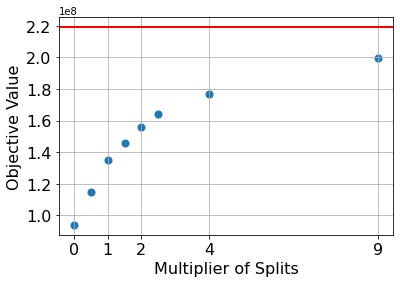

In [116]:
#print(dataFrame.groupby(by=0).describe())
stringKdf = dataFrame.groupby(by=0).describe().to_string(float_format=formatFloat).replace("\n", " \\\\\n")
print(stringKdf)

#dataFramePD = dataFrame.to_pandas()
ax = dataFrame.plot.scatter(x=0, y=1, s=50, fontsize=16, grid=True)
ax.axhline(y=2.1911529462620056e+08, color='r', lw=2)
ax.set_xlabel("Multiplier of Splits", fontsize=16)
ax.set_ylabel("Objective Value", fontsize=16)
ax.set_xticks([0, 1, 2, 4, 9])
#ax.ticklabel_format(useOffset=False, style='plain')
plt.savefig('ObjectiveValues.eps', format='eps', bbox_inches = "tight")
plt.show()

In [117]:
folder = rootFolder + 'SASS/'

dataList = list()
for parameter in ['0', '0.5', '1', '1.5', '2', '2.5', '4']:
    for counter in range(1, 41):
        if parameter is not '4':
            fileName = folder + str(parameter) + '/' + str(counter) + '.json'
        else:
            fileName = rootFolder + 'SASS_1_Thread/4/1.json'

        with open(fileName) as jsonFile:
            optimalSolution = json.load(jsonFile)

            counterSol = 0
            for varSolution in optimalSolution["Vars"]:
                if round(float(varSolution["X"])) == 1:
                    counterSol += 1

            dataList.append((parameter, counterSol))

remainingFileNames = ['SASS_1_Thread/9/result1.sol', 'SSMS_1_Thread/finalResult.sol']
for i in range(len(remainingFileNames)):
    fileName = rootFolder + remainingFileNames[i]

    with open(fileName) as file:
        counterSol = 0
        for line in file:
            if not line.startswith('#') and not line.startswith('pos') and round(float(line.split()[1])) == 1:
                counterSol += 1
    
    if i == 0:
        dataList.append((9, counterSol))
    else:
        print(counterSol)

dataFrame = pd.DataFrame(data=dataList, dtype=float)
dataList = None

<>:6: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:6: SyntaxWarning: "is not" with a literal. Did you mean "!="?
/tmp/ipykernel_10539/1154467582.py:6: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if parameter is not '4':


71585


                 0                                                                       \\
             count      mean       std       min       25%       50%       75%       max \\
1                                                                                        \\
26250.0  & 33.0000  & 0.0000  & 0.0000  & 0.0000  & 0.0000  & 0.0000  & 0.0000  & 0.0000 \\
26257.0   & 7.0000  & 0.0000  & 0.0000  & 0.0000  & 0.0000  & 0.0000  & 0.0000  & 0.0000 \\
34929.0  & 40.0000  & 0.5000  & 0.0000  & 0.5000  & 0.5000  & 0.5000  & 0.5000  & 0.5000 \\
42905.0  & 40.0000  & 1.0000  & 0.0000  & 1.0000  & 1.0000  & 1.0000  & 1.0000  & 1.0000 \\
46113.0  & 40.0000  & 1.5000  & 0.0000  & 1.5000  & 1.5000  & 1.5000  & 1.5000  & 1.5000 \\
50180.0  & 40.0000  & 2.0000  & 0.0000  & 2.0000  & 2.0000  & 2.0000  & 2.0000  & 2.0000 \\
52620.0  & 40.0000  & 2.5000  & 0.0000  & 2.5000  & 2.5000  & 2.5000  & 2.5000  & 2.5000 \\
57152.0  & 40.0000  & 4.0000  & 0.0000  & 4.0000  & 4.0000  & 4.0000  & 4.0000  

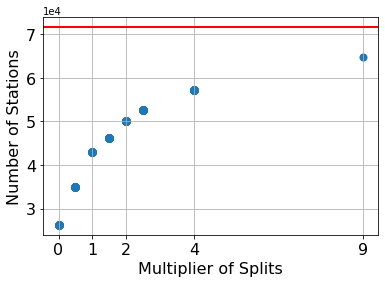

In [118]:
stringKdf = dataFrame.groupby(by=1).describe().to_string(float_format=formatFloat).replace("\n", " \\\\\n")
print(stringKdf)

#dataFramePD = dataFrame.to_pandas()
ax = dataFrame.plot.scatter(x=0, y=1, s=50, fontsize=16, grid=True)
ax.axhline(y=counterSol, color='r', lw=2)
ax.set_xlabel("Multiplier of Splits", fontsize=16)
ax.set_ylabel("Number of Stations", fontsize=16)
ax.set_xticks([0, 1, 2, 4, 9])
#ax.ticklabel_format(useOffset=False, style='plain')
ax.ticklabel_format(axis='y', style='sci', scilimits=(0,0))
plt.savefig('NumberOfStations.eps', format='eps', bbox_inches = "tight")
plt.show()

Loading data for analysis of objective values

/home/cristiano/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: FutureWarning: Could not cast to float64, falling back to object. This behavior is deprecated. In a future version, when a dtype is passed to 'DataFrame', either all columns will be cast to that dtype, or a TypeError will be raised
  exec(code_obj, self.user_global_ns, self.user_ns)


       0             1  Budget Method
0    0.0  0.000000e+00     0.0   MILP
1    0.0  0.000000e+00     1.0   MILP
2    0.0  0.000000e+00     2.0   MILP
3    0.0  0.000000e+00     3.0   MILP
4    0.0  0.000000e+00     4.0   MILP
..   ...           ...     ...    ...
175  2.5  1.640093e+08    25.0   MILP
176  2.5  1.640093e+08    26.0   MILP
177  2.5  1.640112e+08    27.0   MILP
178  2.5  1.640112e+08    28.0   MILP
179  2.5  1.640112e+08    29.0   MILP

[180 rows x 4 columns]
      0           1  Budget    Method
0   0.0         0.0       0  Dijkstra
0   0.0         0.0       1  Dijkstra
0   0.0         0.0       2  Dijkstra
0   0.0         0.0       3  Dijkstra
0   0.0         0.0       4  Dijkstra
..  ...         ...     ...       ...
0   9.0  48124868.0      25  Dijkstra
0   9.0  48124868.0      26  Dijkstra
0   9.0  48124868.0      27  Dijkstra
0   9.0  48124868.0      28  Dijkstra
0   9.0  48124868.0      29  Dijkstra

[570 rows x 4 columns]
      0           1  Budget      Method


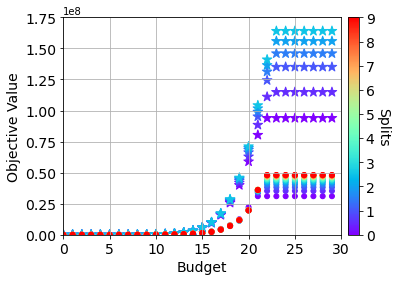

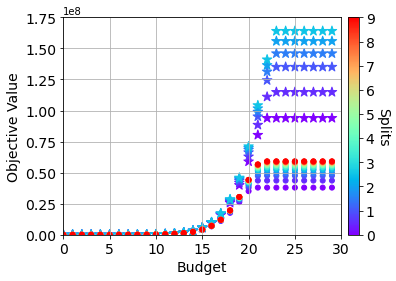

In [119]:
def plot_colormap_obj_values(dataFrames, markers, filename):
    marker_size = 100
    for dataFrame, marker_type in zip(dataFrames, markers):
        plt.scatter(x=dataFrame['Budget'], y=dataFrame[1], c=dataFrame[0], cmap='rainbow',
                    s=marker_size, marker=marker_type, vmin=0, vmax=9)

    plt.xlabel('Budget', fontsize=14)
    plt.ylabel('Objective Value', fontsize=14)
    plt.tick_params(axis='both', which='major', labelsize=14)
    plt.xlim([0, 30])
    plt.ylim([0, 1.75e+08])
    plt.yticks(np.arange(0, 2.0e+08, 2.5e+07))
    plt.grid()
    color_bar = plt.colorbar(pad=0.02)
    color_bar.set_ticks(range(0, 10))
    color_bar.ax.tick_params(labelsize=14)
    color_bar.set_label('Splits', fontsize=14, labelpad=15, rotation=270)
    plt.savefig(filename, format='eps', bbox_inches = "tight")
    plt.show()

folder = rootFolder + 'SASS/Costs/'

dataList = list()
budget_params = list(range(30))
for parameter in paramsUpTo2Half:
    for budget in budget_params:
        fileName = folder + str(parameter) + '/1_' + str(budget) + '.json'
        with open(fileName) as jsonFile:
            optimalSolution = json.load(jsonFile)
            dataList.append((parameter, optimalSolution["SolutionInfo"]["ObjVal"], budget, 'MILP'))
df_MILP = pd.DataFrame(data=dataList, dtype=float, columns=[0, 1, 'Budget', 'Method'])
dataList = None
print(df_MILP)

df_dijkstra, df_max_utility = read_heuristics_files(folderObjectiveHeuristics, paramsUpTo9, budget_params, False)
# Removing repeated values since optimal objective values are all the same
df_dijkstra = df_dijkstra.loc[0]
df_max_utility = df_max_utility.loc[0]
print(df_dijkstra)
print(df_max_utility)

plot_colormap_obj_values([df_MILP, df_dijkstra], ['*', '.'], 'Objective_values_cost_dijkstra.eps')
plot_colormap_obj_values([df_MILP, df_max_utility], ['*', '.'], 'Objective_values_cost_max_utility.eps')

In [120]:
dataList = list()
num_runs = 40
budget_params = [6, 15, 23, 24, 29]
for budget in budget_params:
    for parameter in paramsUpTo2Half:
        for i in range(num_runs):
            fileName = pathlib.Path(folder + str(parameter) + '/' + str(i + 1) + '_' + str(budget) + '.json')

            with open(fileName) as jsonFile:
                optimalSolution = json.load(jsonFile)
                dataList.append((parameter, optimalSolution["SolutionInfo"]["Runtime"]))
    
    print('Budget', budget)

    df_MILP = pd.DataFrame(data=dataList, dtype=float, columns=[0, 1])
    dataList = list()
    printTableRunTime(df_MILP, 'MILP')

    df_dijkstra, df_max_utility = read_heuristics_files(folderRunTimeHeuristics, paramsUpTo9, budgets=[budget])
    df_dijkstra.drop(['Budget', 'Method'], axis=1, inplace=True)
    df_max_utility.drop(['Budget', 'Method'], axis=1, inplace=True)
    #print(df_dijkstra)
    #print(df_max_utility)
    
    # Converting from microseconds to seconds
    df_dijkstra[1] = df_dijkstra[1]/1000000
    df_max_utility[1] = df_max_utility[1]/1000000
    printTableRunTime(df_dijkstra, 'Dijkstra')
    printTableRunTime(df_max_utility, 'MaxUtility')

Budget 6
MILP
0              0.0        0.5        1.0        1.5        2.0        2.5 \\
1 count  & 40.0000  & 40.0000  & 40.0000  & 40.0000  & 40.0000  & 40.0000 \\
  mean    & 4.4545   & 6.3170   & 9.8105  & 14.8409  & 20.3472  & 26.7559 \\
  std     & 0.1097   & 0.0956   & 0.1435   & 0.1126   & 0.4830   & 0.6763 \\
  min     & 4.3900   & 6.2566   & 9.7412  & 14.7252  & 19.2588  & 25.4648 \\
  25%     & 4.4101   & 6.2848   & 9.7629  & 14.7715  & 20.3616  & 26.9218 \\
  50%     & 4.4249   & 6.3047   & 9.7841  & 14.8201  & 20.4511  & 27.0818 \\
  75%     & 4.4390   & 6.3245   & 9.8039  & 14.8551  & 20.4850  & 27.1562 \\
  max     & 4.8523   & 6.8819  & 10.6722  & 15.3809  & 22.1241  & 27.4757
Dijkstra
0              0.0        0.5        1.0        1.5        2.0        2.5        3.0        3.5        4.0        4.5        5.0        5.5        6.0        6.5        7.0        7.5        8.0        8.5        9.0 \\
1 count  & 40.0000  & 40.0000  & 40.0000  & 40.0000  & 40.0000  & 4